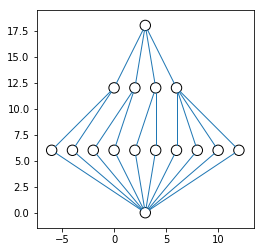

In [17]:
from matplotlib import pyplot
from math import cos, sin, atan
import numpy as np


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, weights):
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)
        self.weights = weights

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return horizontal_distance_between_neurons * (number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, linewidth):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = neuron_radius * sin(angle)
        y_adjustment = neuron_radius * cos(angle)
        line_x_data = (neuron1.x - x_adjustment, neuron2.x + x_adjustment)
        line_y_data = (neuron1.y - y_adjustment, neuron2.y + y_adjustment)
        line = pyplot.Line2D(line_x_data, line_y_data, linewidth=linewidth)
        pyplot.gca().add_line(line)

    def draw(self):
        for this_layer_neuron_index in range(len(self.neurons)):
            neuron = self.neurons[this_layer_neuron_index]
            neuron.draw()
            if self.previous_layer:
                for previous_layer_neuron_index in range(len(self.previous_layer.neurons)):
                    previous_layer_neuron = self.previous_layer.neurons[previous_layer_neuron_index]
                    weight = self.previous_layer.weights[this_layer_neuron_index, previous_layer_neuron_index]
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weight)


class NeuralNetwork():
    def __init__(self):
        self.layers = []

    def add_layer(self, number_of_neurons, weights=None):
        layer = Layer(self, number_of_neurons, weights)
        self.layers.append(layer)

    def draw(self):
        for layer in self.layers:
            layer.draw()
        pyplot.axis('scaled')
        pyplot.show()


if __name__ == "__main__":
    vertical_distance_between_layers = 6
    horizontal_distance_between_neurons = 2
    neuron_radius = 0.5
    number_of_neurons_in_widest_layer = 4
    network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
    weights1 = np.array([\
                         [1],\
                         [1],\
                         [1],\
                         [1],\
                         [1],\
                         [1],\
                         [1],\
                         [1],\
                         [1],\
                         [1]])
    weights2 = np.array([\
                         [1,1,0,0,0,0,0,0,0,0],\
                         [0,0,1,1,0,0,0,0,0,0],\
                         [0,0,0,0,1,1,0,0,0,0],\
                         [0,0,0,0,0,0,1,1,1,1]])
    weights3 = np.array([\
                         [1,1,1,1]])
    
    network.add_layer(1, weights1)
    network.add_layer(10, weights2)
    network.add_layer(4, weights3)
    network.add_layer(1)
    network.draw()

### Problem in word form

$\begin{equation*}
\begin{aligned}
& \underset{\text{Worker Assingment}}{minimize}
& & \textrm{Time to complete all tasks} \\
& subject \ to:
& & \text{Each task must be completed}  \\ 
& & & \text{Each worker is assigned one task at a time} \\
\end{aligned}
\end{equation*}
$

### Model 1 in latex

$\begin{equation*}
\begin{aligned}
& \underset{x_{ijk} \ \lambda}{\text{minimize}}
& & \lambda \\
& \text{subject to:}
& & \sum\limits_{i=1}^T x_{ijk} \le 1 
& \forall j, k \\ 
& & & \sum\limits_{j=1}^W \sum\limits_{k=1}^M x_{ijk} == 1
& \forall i \\
& & & \sum\limits_{j=1}^W \sum\limits_{k=1}^M x_{ijk}*k \leq \lambda
& \forall i \\
& & & x_{ijk} \in \{0,1\}
\end{aligned}
\end{equation*}
$

